In [1]:
#imports
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#information of data
data.info()

In [5]:
#condition=data.duplicated()
#data[condition]           #drop_duplicates() = to drop duplicate data if the is duplicate data.
data[data.duplicated()]

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area


In [6]:
data[data['X2 house age'] == 10]

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
138,139,2013.167,10.0,942.4664,0,24.97843,121.52406,43.5


In [13]:
#check if dataframe has null values.
#can be checked from above information.
data.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [3]:
data.duplicated().sum()

NameError: name 'data' is not defined

In [17]:
data.corr() #Gives features correlation

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


<Axes: >

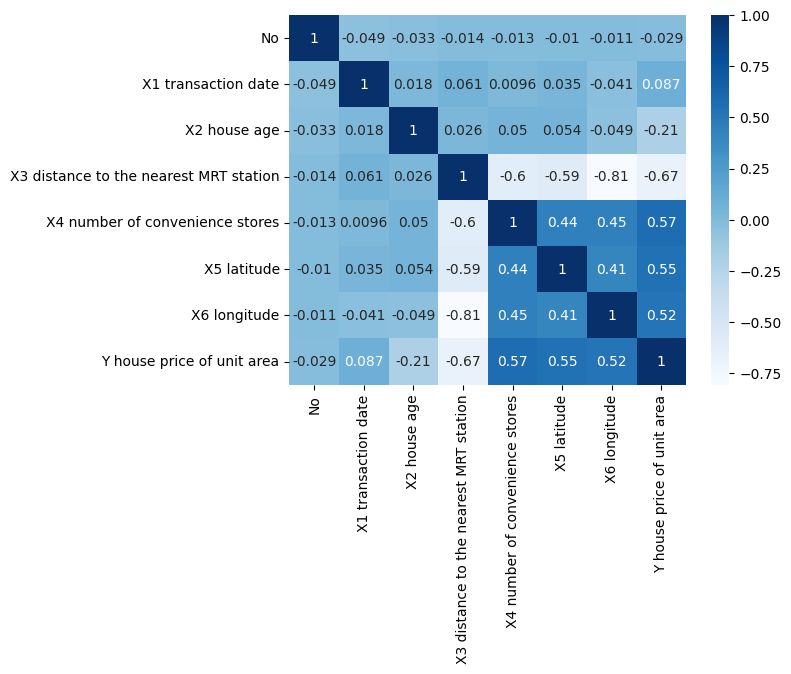

In [21]:
sns.heatmap(data.corr(), annot=True, cmap="Blues")

In [22]:
#dropping other independent features.
data.drop(['No','X1 transaction date'], axis=1, inplace=True)
data

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4
410,5.6,90.45606,9,24.97433,121.54310,50.0
411,18.8,390.96960,7,24.97923,121.53986,40.6
412,8.1,104.81010,5,24.96674,121.54067,52.5


In [13]:
# splitting the dependent and independent features.
X = data.drop(['Y house price of unit area'], axis=1)
y = data['Y house price of unit area']
print(X)

      No  X1 transaction date  X2 house age  \
0      1             2012.917          32.0   
1      2             2012.917          19.5   
2      3             2013.583          13.3   
3      4             2013.500          13.3   
4      5             2012.833           5.0   
..   ...                  ...           ...   
409  410             2013.000          13.7   
410  411             2012.667           5.6   
411  412             2013.250          18.8   
412  413             2013.000           8.1   
413  414             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 3

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42        #test size=20%=0.2 (0-1).Random state=42(jati click garera run gareni x train,test stays in same order.order depends on value.)
)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((331, 7), (83, 7), (331,), (83,))

In [16]:
lr_model = LinearRegression()

In [17]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [18]:
pd.DataFrame(lr_model.coef_, X.columns, columns=['coeficient'])

,coeficient
No,-0.005617
X1 transaction date,5.407435
X2 house age,-0.267828
X3 distance to the nearest MRT station,-0.004815
X4 number of convenience stores,1.081144
X5 latitude,226.048799
X6 longitude,-30.125491


In [ ]:
#Prediction
y_pred = lr_model.predict(X_test)

In [ ]:
com = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred}).reset_index()
com

In [ ]:
y_pred = lr_model.predict(X_test)
len_test = len(y_pred)
default_arr = np.array(range(len_text))
default_arr

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(default_arr,y_test,marker='o',label = "Ground truth")
plt.scatter(default_arr,y_pred,marker='x',label = "prediction")
plt.legend()
plt.grid

In [ ]:
# check accuracy of the model on test set
lr_model.score(x_test,y_test)

In [ ]:
from sklearn import matrics
import numpy as np

In [ ]:
MSE = metrices.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

In [1]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

data= pd.read_csv("./csv_files/diabetes.csv")
data
data.info()

data.duplicated().sum()

data['Outcome'].unique()
X=data.drop('Outcome',axis=1)
y=data['Outcome']

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(
    X,y, train_size = 0.20 , random_state = 33
)

FileNotFoundError: [Errno 2] No such file or directory: './csv_files/diabetes.csv'